### Hotel Bookings

In this project we are exploring data about hotels. we'll clean the data and present it visuallyin prder to find ways to improve business.

In [46]:
import pandas as pd
import numpy as np
import csv
import an_filled as an
import logging
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import plotly.express as px

In [47]:
logging.basicConfig(filename= an.LOG_FILE,
                    filemode='a+',
                    format='%(asctime)s,%(msecs)d %(name)s %(levelname)s %(message)s',
                    datefmt='%H:%M:%S',
                    level=logging.INFO)

In [48]:
# Loading file with a load file function, the path comes from a hardcoded file.
def load_file(s_path, s_file_name):

    '''
    This function loads a csv into a pandas dataframe.

    Parameters: 
        s_path (str): the path to the csv file
        s_file_name(str): csv name

    Returns:
        bool
        pd.DataFrame() if loaded successfully 
    '''

    df_file = pd.DataFrame()
    if (not s_path) or (not s_file_name):
        logging.error('The file name or path came up empty. Filename: ' + s_file_name + ' Path: ' + s_path)
        return False, df_file
    s_path = s_path + '/' + s_file_name
    try:
        df_file = pd.read_csv(s_path, parse_dates=['reservation_status_date'], na_values=['none', 'Undefined', ' ', '-'])
        logging.info('File loaded successfully.')
    except:
        logging.error('cannot load hotel file: ' + s_path)
        return False, df_file

    return True, df_file

worked, df_hotels = load_file(an.INFO_FOLDER, an.HOTELS_INFO_FILE)

In [49]:
# Viewing first five rows.
df_hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [50]:
# Converting is_canceled column into bool column.
try:
    df_hotels.is_canceled = df_hotels.is_canceled.map(lambda val: True if val == 0 else False)
    logging.info("Column 'is_canceled' was converted to bool type.")
    df_hotels.is_canceled.dtypes

except:
    logging.error("Could not convert column 'is_canceled' into bool type.")

In [51]:
try:   
    df_hotels['arrival_date'] = df_hotels.apply(lambda row : str(row.arrival_date_year) + '/' + str(row.arrival_date_month) + '/' + str(row.arrival_date_day_of_month), axis=1)
    df_hotels['arrival_date'] = pd.to_datetime(df_hotels.arrival_date, format='%Y/%B/%d')
    df_hotels.arrival_date.dtypes
    logging.info("Column 'arrival_date' was converted into datetime.")

except Exception as e:
    logging.error(e)

In [52]:
# Dropping columns: 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month' 
df_hotels.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace = True)

In [53]:
df_hotels.arrival_date

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 119390, dtype: datetime64[ns]

In [54]:
df_hotels.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')

In [55]:
# creating a column 'hotel_booking' that has a 'yes' for bookings that weren't done through the agent or a company, and 'no' for the rest.
try:   
    df_hotels['direct_booking'] = df_hotels.apply(lambda row : 'yes' if pd.isnull(row['agent']) and pd.isnull(row['company']) else 'no', axis=1)
    logging.info("A 'direct_booking' column was created.")

except Exception as e:
    logging.error(e)

In [56]:
df_hotels.direct_booking.unique()

array(['yes', 'no'], dtype=object)

In [57]:
# Checking for null values.
df_hotels.isnull().sum(axis = 0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_week_number               0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                1169
country                              488
market_segment                         2
distribution_channel                   5
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr             

In [58]:
# Filling missing values in country column with the country of the row before.
df_hotels['country'].fillna(method='bfill', inplace= True)

In [59]:
# Filling missing values in children column with the mean of the column.
df_hotels['children'].fillna(statistics.mode(df_hotels['children']), inplace=True)

In [60]:
# Filling missing values in agent column with a string.
df_hotels['agent'].fillna('no agent', inplace=True)

In [61]:
# Filling missing values in company column with a string.
df_hotels['company'].fillna('no company', inplace=True)

In [62]:
# Filling missing values in meal column with 'SC' that calls a no meal package.
df_hotels['meal'].fillna('SC', inplace=True)

In [63]:
# Filling missing values in market_segment column with the value in the row before.
df_hotels['market_segment'].fillna(method='bfill', inplace=True)

In [64]:
# Filling missing values in distribution_channel column with the value in the row before.
df_hotels['distribution_channel'].fillna(method='bfill', inplace=True)

In [65]:
# Checking that there are no missing values.
df_hotels.isnull().sum(axis = 0).sum()

0

In [66]:
# Converting is_repeated_guest column into bool column.
try:
    df_hotels.is_repeated_guest = df_hotels.is_repeated_guest.map(lambda val: True if val == 0 else False)
    logging.info("Column 'is_repeated_guest' was converted into bool type.")
    df_hotels.is_canceled.dtypes

except:
    logging.error("Could not convert column 'is_repeated_guest' into bool type")

#### Visualizing the data

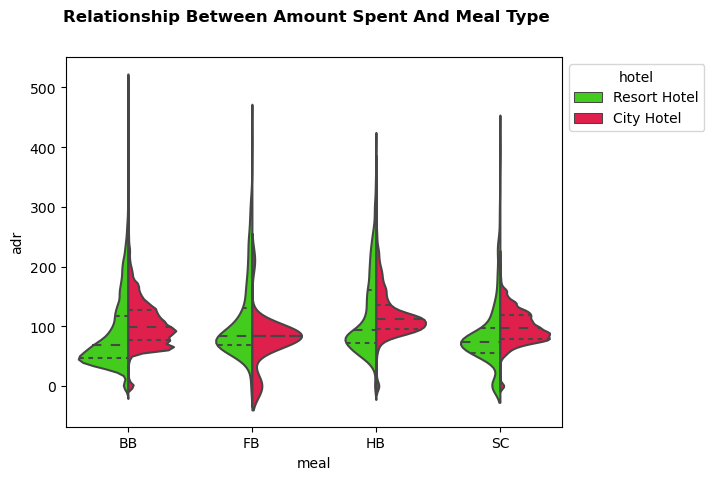

In [67]:
# Plotting a violinplot without outliers.
fig=sns.violinplot(x='meal', y='adr', data=df_hotels[df_hotels['adr'] < 5000], hue="hotel", inner="quartile", split=True, palette="prism")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.suptitle("Relationship Between Amount Spent And Meal Type", weight="demi")
plt.show()

While viewing the plots it was interesting to notice that the SC which represents no meal ordered, is close to 0 for the Resort hotel and higher up for the city hotel. We also see, that in general, the city hotel is more expensive with no correlation to the meal type. The graphs are mostly right skewed.

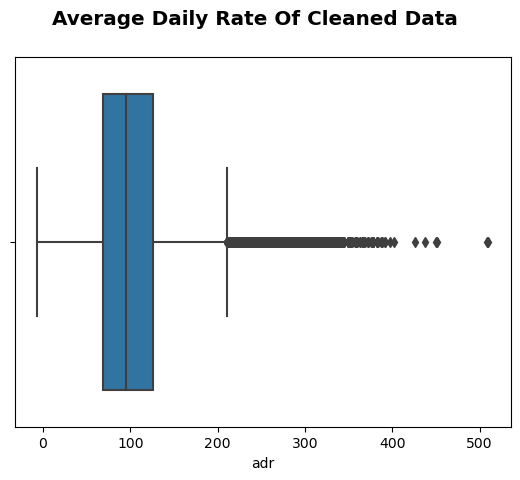

In [68]:
# Ploting a boxplot without the main outlier
sns.boxplot(x = df_hotels['adr'][df_hotels['adr'] < 5000])
plt.suptitle('Average Daily Rate Of Cleaned Data', weight = 'bold', size = 'x-large')
plt.show()

After plotting without the outlier we can see that 50% of the customers spent around 100. The other 50% are in the range of 94 to 530.

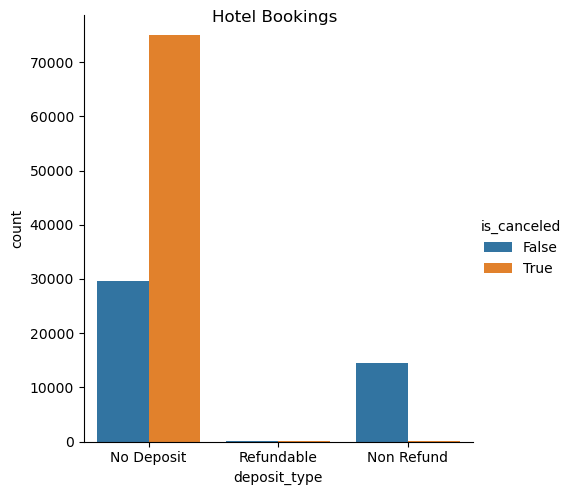

In [69]:
sns.catplot(data=df_hotels, x='deposit_type', hue='is_canceled', kind='count')
plt.suptitle('Hotel Bookings')
plt.show()

We find that most of the customers that canceled didn't give a deposit. Most of the non refunded bookings were not canceled.

In [71]:
df = df_hotels
fig = px.sunburst(df, path=['hotel', 'is_canceled'], values='is_repeated_guest', title='Cancelations For Repeated Guests In Hotels')
fig.show()

We find that in the resort hotel a lot of the cancelations were for repeated guests that frequented the hotel in the past. In the city hotel, the cancelations are divided more evenly between repeated guests and first time guests. It seems that people book reservations in resort hotels by default. If they find a better option they will cancel. (note: By clicking an 'hotel' in the graph, the graph will present clearer data.)